# Import Libraries

In [1]:
!pip install openpyxl
!pip install plotly

In [2]:
# Linear Algebra
import numpy as np

# Data Processing
import pandas as pd

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

# Import data from Github

In [3]:
url = 'https://github.com/Virementz/tekkis/raw/main/reservation_raw%20data_edited.xlsx'

In [4]:
xls = pd.ExcelFile(url)

In [5]:
df = pd.read_excel(url)

In [6]:
df.info

<bound method DataFrame.info of       Unnamed: 0 Unnamed: 1   Unnamed: 2 Unnamed: 3  Unnamed: 4  \
0            mid   bookings  hoursbooked  paidspend  promospend   
1              1         17         1497    8169.77     1804.16   
2              2          8         1483   11282.62         NaN   
3              3         41         1441    6525.24     2288.46   
4              4         52         1269   12160.09     1298.61   
...          ...        ...          ...        ...         ...   
11653      11653          1            0      10.56         NaN   
11654      11654          1            0      10.93         NaN   
11655      11655          3            0      25.94         NaN   
11656      11656          1            0          7         NaN   
11657      11657          1            0        NaN        8.48   

           Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  \
0      paidspend/hour         NaN         NaN         NaN         NaN   
1            5.45

# Data Reading, Understanding & Cleaning

Drop null column and rows

In [7]:
df.drop(df.columns.to_series()["Unnamed: 6":"Unnamed: 15"], axis=1)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,mid,bookings,hoursbooked,paidspend,promospend,paidspend/hour
1,1,17,1497,8169.77,1804.16,5.457428
2,2,8,1483,11282.62,NaN,7.60797
3,3,41,1441,6525.24,2288.46,4.528272
4,4,52,1269,12160.09,1298.61,9.582419
...,...,...,...,...,...,...
11653,11653,1,0,10.56,NaN,0
11654,11654,1,0,10.93,NaN,0
11655,11655,3,0,25.94,NaN,0
11656,11656,1,0,7,NaN,0


In [8]:
df.columns = df.iloc[0]
df = df[1:]
df.head()

,mid,bookings,hoursbooked,paidspend,promospend,paidspend/hour,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,17,1497,8169.77,1804.16,5.457428,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,8,1483,11282.62,NaN,7.60797,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,41,1441,6525.24,2288.46,4.528272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,52,1269,12160.09,1298.61,9.582419,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,14,1234,12630.49,2035.69,10.235405,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df=df.dropna(axis=1, how='all')

In [10]:
df.head()

,mid,bookings,hoursbooked,paidspend,promospend,paidspend/hour
1,1,17,1497,8169.77,1804.16,5.457428
2,2,8,1483,11282.62,NaN,7.60797
3,3,41,1441,6525.24,2288.46,4.528272
4,4,52,1269,12160.09,1298.61,9.582419
5,5,14,1234,12630.49,2035.69,10.235405


In [11]:
df.columns

Index(['mid', 'bookings', 'hoursbooked', 'paidspend', 'promospend',
       'paidspend/hour'],
      dtype='object', name=0)

In [12]:
df.shape

(11657, 6)

In [13]:
df = df.drop_duplicates()
df.shape

(11657, 6)

it seems like there is no duplicate data on the database

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11657 entries, 1 to 11657
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   mid             11657 non-null  object
 1   bookings        11657 non-null  object
 2   hoursbooked     11657 non-null  object
 3   paidspend       11228 non-null  object
 4   promospend      7165 non-null   object
 5   paidspend/hour  11657 non-null  object
dtypes: object(6)
memory usage: 637.5+ KB


In [15]:
df.isna().sum()

0
mid                  0
bookings             0
hoursbooked          0
paidspend          429
promospend        4492
paidspend/hour       0
dtype: int64

most features dont have any null value except paidspend and promospend feature. now we need to replace the null value with 0 in for the sake of data modelling.

In [16]:
df['paidspend'].fillna(value='0',inplace=True)

In [17]:
df['promospend'].fillna(value='0',inplace=True)

In [18]:
df.isna().sum()

0
mid               0
bookings          0
hoursbooked       0
paidspend         0
promospend        0
paidspend/hour    0
dtype: int64

now there is no null value in our dataframe anymore, we can proceed to the next step

In [19]:
for i in df.columns:
    print(i ,'has', df[i].unique(),'\n')

mid has [1 2 3 ... 11655 11656 11657] 

bookings has [17 8 41 52 14 31 46 25 39 48 42 16 22 18 15 32 24 10 34 26 28 19 12 30 1
 27 6 4 37 20 7 132 21 3 2 45 23 13 11 9 50 36 29 33 61 94 59 68 35 5 47
 60 44 111 83 38 40 108 55 43 71 54] 

hoursbooked has [1497 1483 1441 1269 1234 1231 1186 1152 1108 1041 1011 1003 978 974 958
 942 909 904 895 892 890 877 861 835 805 797 793 776 772 771 762 761 732
 730 723 711 702 697 693 688 667 657 656 654 651 643 640 632 631 611 608
 607 601 600 597 576 575 570 555 550 529 528 526 525 519 518 516 513 503
 500 496 495 494 489 485 483 480 474 472 469 468 466 462 461 459 455 453
 450 449 446 444 443 442 441 440 437 434 430 429 426 424 421 417 415 411
 410 408 406 403 402 401 399 397 393 390 389 388 386 385 384 381 378 377
 376 375 368 367 365 364 361 360 356 355 354 352 349 348 347 344 342 340
 337 336 335 334 331 330 329 328 323 322 321 320 319 318 317 315 314 313
 312 310 309 308 307 304 302 301 300 299 298 296 295 293 290 289 288 287
 286 285 284 28

In [20]:
df.describe

<bound method NDFrame.describe of 0        mid bookings hoursbooked paidspend promospend paidspend/hour
1          1       17        1497   8169.77    1804.16       5.457428
2          2        8        1483  11282.62          0        7.60797
3          3       41        1441   6525.24    2288.46       4.528272
4          4       52        1269  12160.09    1298.61       9.582419
5          5       14        1234  12630.49    2035.69      10.235405
...      ...      ...         ...       ...        ...            ...
11653  11653        1           0     10.56          0              0
11654  11654        1           0     10.93          0              0
11655  11655        3           0     25.94          0              0
11656  11656        1           0         7          0              0
11657  11657        1           0         0       8.48              0

[11657 rows x 6 columns]>

In [21]:
df=df.rename(columns={'paidspend/hour':'paidspendperhour'})

In [22]:
df.info

<bound method DataFrame.info of 0        mid bookings hoursbooked paidspend promospend paidspendperhour
1          1       17        1497   8169.77    1804.16         5.457428
2          2        8        1483  11282.62          0          7.60797
3          3       41        1441   6525.24    2288.46         4.528272
4          4       52        1269  12160.09    1298.61         9.582419
5          5       14        1234  12630.49    2035.69        10.235405
...      ...      ...         ...       ...        ...              ...
11653  11653        1           0     10.56          0                0
11654  11654        1           0     10.93          0                0
11655  11655        3           0     25.94          0                0
11656  11656        1           0         7          0                0
11657  11657        1           0         0       8.48                0

[11657 rows x 6 columns]>

# Clustering based on 2 features

In [23]:
from sklearn.cluster import KMeans
import pickle
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11657 entries, 1 to 11657
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   mid               11657 non-null  object
 1   bookings          11657 non-null  object
 2   hoursbooked       11657 non-null  object
 3   paidspend         11657 non-null  object
 4   promospend        11657 non-null  object
 5   paidspendperhour  11657 non-null  object
dtypes: object(6)
memory usage: 637.5+ KB


In [25]:
#We take just the Paidspend/hour and Booking
df1=df[["mid","bookings","hoursbooked","paidspend","promospend", "paidspendperhour"]]
X=df1[["paidspendperhour","bookings"]]

In [26]:
#The input data
X.head()

,paidspendperhour,bookings
1,5.457428,17
2,7.60797,8
3,4.528272,41
4,9.582419,52
5,10.235405,14


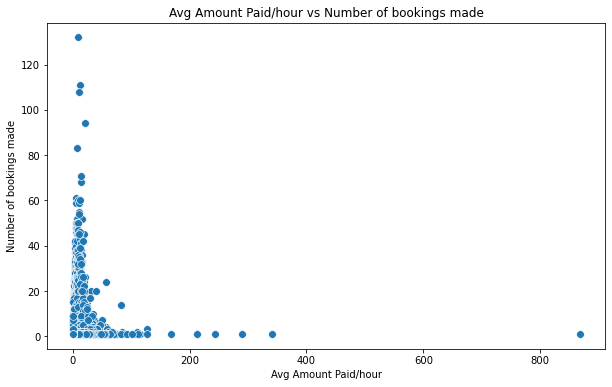

In [27]:
#Scatterplot of the input data
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'paidspendperhour',y = 'bookings',  data = X  ,s = 60 )
plt.xlabel('Avg Amount Paid/hour')
plt.ylabel('Number of bookings made') 
plt.title('Avg Amount Paid/hour vs Number of bookings made')
plt.show()

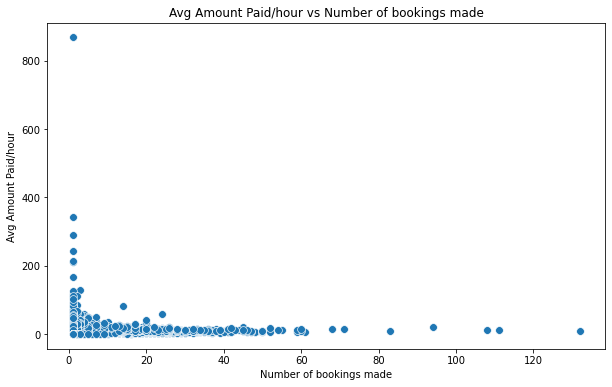

In [28]:
#Scatterplot of the input data
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'bookings',y = 'paidspendperhour',  data = X  ,s = 60 )
plt.xlabel('Number of bookings made')
plt.ylabel('Avg Amount Paid/hour') 
plt.title('Avg Amount Paid/hour vs Number of bookings made')
plt.show()

In [29]:
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)

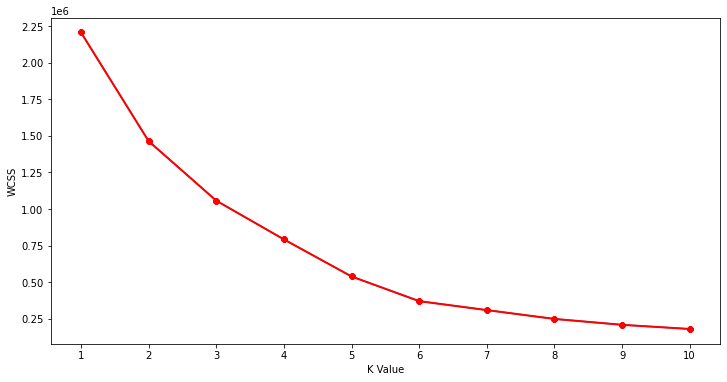

In [30]:
#The elbow curve
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

This is known as the elbow graph, the x-axis being the number of clusters, the number of clusters is taken at the elbow joint point. This point is the point where making clusters is most relevant as here the value of WCSS suddenly stops decreasing. Here in the graph, after 5 the drop is minimal, so we take 5 to be the number of clusters.

In [31]:
#Taking 5 clusters
km1=KMeans(n_clusters=5)
#Fitting the input data
km1.fit(X)
#predicting the labels of the input data
y=km1.predict(X)
#adding the labels to a column named label
df1["label"] = y
#The new dataframe with the clustering done
df1.head()

,mid,bookings,hoursbooked,paidspend,promospend,paidspendperhour,label
1,1,17,1497,8169.77,1804.16,5.457428,4
2,2,8,1483,11282.62,0,7.60797,0
3,3,41,1441,6525.24,2288.46,4.528272,4
4,4,52,1269,12160.09,1298.61,9.582419,4
5,5,14,1234,12630.49,2035.69,10.235405,4


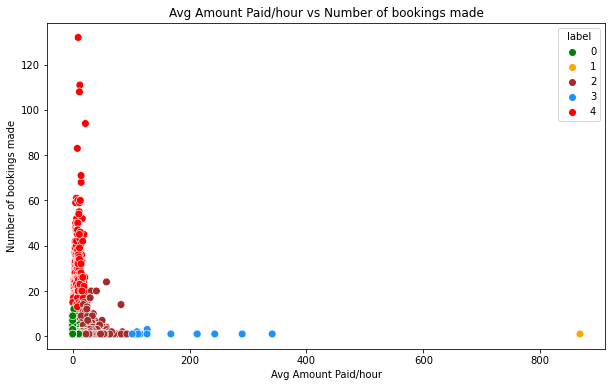

In [39]:
#Scatterplot of the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'paidspendperhour',y = 'bookings',hue="label",  
                 palette=['green','orange','brown','dodgerblue','red'], legend='full',data = df1  ,s = 60 )
plt.xlabel('Avg Amount Paid/hour')
plt.ylabel('Number of bookings made') 
plt.title('Avg Amount Paid/hour vs Number of bookings made')
plt.show()

In [40]:
cust1=df1[df1["label"]==1]
print('Number of customer in 1st group=', len(cust1))
print('They are -', cust1["mid"].values)
print("--------------------------------------------")
cust2=df1[df1["label"]==2]
print('Number of customer in 2nd group=', len(cust2))
print('They are -', cust2["mid"].values)
print("--------------------------------------------")
cust3=df1[df1["label"]==0]
print('Number of customer in 3rd group=', len(cust3))
print('They are -', cust3["mid"].values)
print("--------------------------------------------")
cust4=df1[df1["label"]==3]
print('Number of customer in 4th group=', len(cust4))
print('They are -', cust4["mid"].values)
print("--------------------------------------------")
cust5=df1[df1["label"]==4]
print('Number of customer in 5th group=', len(cust5))
print('They are -', cust5["mid"].values)
print("--------------------------------------------")

Number of customer in 1st group= 1
They are - [10247]
--------------------------------------------
Number of customer in 2nd group= 1878
They are - [105 465 480 ... 11557 11560 11562]
--------------------------------------------
Number of customer in 3rd group= 9017
They are - [2 24 36 ... 11655 11656 11657]
--------------------------------------------
Number of customer in 4th group= 13
They are - [7538 8081 8981 9975 10150 10252 10274 10920 11190 11358 11511 11517 11539]
--------------------------------------------
Number of customer in 5th group= 748
They are - [1 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 25 26 27 28 29
 30 31 32 33 34 35 37 38 40 41 43 44 45 47 48 49 50 51 53 54 55 56 59 60
 61 62 64 65 66 67 69 70 71 72 73 75 77 79 80 82 83 84 85 86 88 89 90 91
 94 95 96 97 99 100 101 102 103 104 106 107 108 109 110 111 112 113 115
 117 118 122 124 125 126 128 130 132 133 134 135 136 137 138 139 141 142
 143 144 145 146 147 148 150 151 153 154 155 156 157 158 159 161

We can clearly see that 5 different clusters have been formed from the data. The green cluster is the customers with the least number of booking and least avg amount paid/hour.

similarly, the blue cluster is the customers with the most avg amount paid/hour but small number of booking made.

we can also see the red cluster is the customer with the most number of booking made but among the lowest avg amount paid/hour

# k-Means Clustering on the basis of 3D data

Now, we shall be working on 3 types of data. Apart from the bookings and paidspendperhour, we shall also take in the promospend.

In [33]:
#Taking the features
df2=df[["mid","bookings","hoursbooked","paidspend","promospend", "paidspendperhour"]]
X2=df2[["hoursbooked","paidspendperhour","bookings"]]

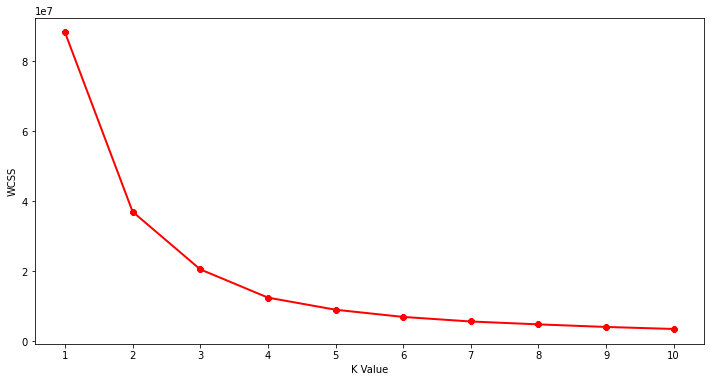

In [34]:
#Now we calculate the Within Cluster Sum of Squared Errors (WSS) for different values of k.
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

Here can assume that K=5 will be a good value

In [35]:
#We choose the k for which WSS starts to diminish
km2 = KMeans(n_clusters=5)
y2 = km.fit_predict(X2)
df2["label"] = y2
#The data with labels
df2.head()

,mid,bookings,hoursbooked,paidspend,promospend,paidspendperhour,label
1,1,17,1497,8169.77,1804.16,5.457428,7
2,2,8,1483,11282.62,0,7.60797,7
3,3,41,1441,6525.24,2288.46,4.528272,7
4,4,52,1269,12160.09,1298.61,9.582419,7
5,5,14,1234,12630.49,2035.69,10.235405,7


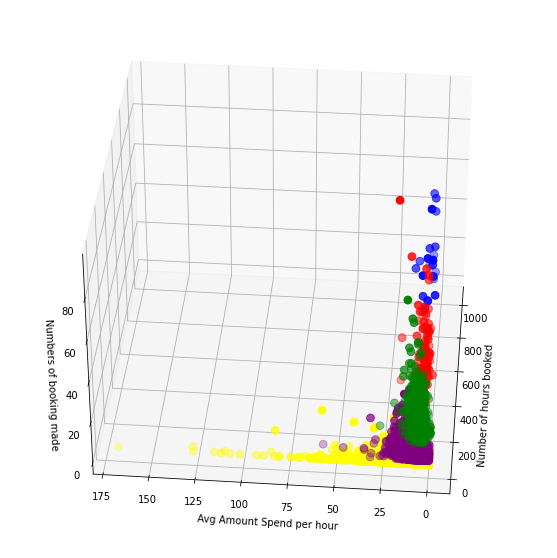

In [37]:
#3D Plot as we did the clustering on the basis of 3 input features
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df2.hoursbooked[df2.label == 0], df2["paidspendperhour"][df2.label == 0], df2["bookings"][df2.label == 0], c='purple', s=60)
ax.scatter(df2.hoursbooked[df2.label == 1], df2["paidspendperhour"][df2.label == 1], df2["bookings"][df2.label == 1], c='red', s=60)
ax.scatter(df2.hoursbooked[df2.label == 2], df2["paidspendperhour"][df2.label == 2], df2["bookings"][df2.label == 2], c='blue', s=60)
ax.scatter(df2.hoursbooked[df2.label == 3], df2["paidspendperhour"][df2.label == 3], df2["bookings"][df2.label == 3], c='green', s=60)
ax.scatter(df2.hoursbooked[df2.label == 4], df2["paidspendperhour"][df2.label == 4], df2["bookings"][df2.label == 4], c='yellow', s=60)
ax.view_init(35, 185)
plt.xlabel("Number of hours booked")
plt.ylabel("Avg Amount Spend per hour")
ax.set_zlabel('Numbers of booking made')
plt.show()

In [38]:
cust1=df2[df2["label"]==1]
print('Number of customer in 1st group=', len(cust1))
print('They are -', cust1["mid"].values)
print("--------------------------------------------")
cust2=df2[df2["label"]==2]
print('Number of customer in 2nd group=', len(cust2))
print('They are -', cust2["mid"].values)
print("--------------------------------------------")
cust3=df2[df2["label"]==0]
print('Number of customer in 3rd group=', len(cust3))
print('They are -', cust3["mid"].values)
print("--------------------------------------------")
cust4=df2[df2["label"]==3]
print('Number of customer in 4th group=', len(cust4))
print('They are -', cust4["mid"].values)
print("--------------------------------------------")
cust5=df2[df2["label"]==4]
print('Number of customer in 5th group=', len(cust5))
print('They are -', cust5["mid"].values)
print("--------------------------------------------")

Number of customer in 1st group= 117
They are - [74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97
 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116
 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134
 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152
 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170
 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188
 189 190]
--------------------------------------------
Number of customer in 2nd group= 23
They are - [10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32]
--------------------------------------------
Number of customer in 3rd group= 2922
They are - [2231 2232 2233 ... 5193 5194 5229]
--------------------------------------------
Number of customer in 4th group= 523
They are - [424 425 426 427 428 429 430 431 432 433 434 435 436 437 438 439 440 441
 442 443 444 445 446 447 448 449 450 451 45

In [42]:
df1.head()

,mid,bookings,hoursbooked,paidspend,promospend,paidspendperhour,label
1,1,17,1497,8169.77,1804.16,5.457428,4
2,2,8,1483,11282.62,0,7.60797,0
3,3,41,1441,6525.24,2288.46,4.528272,4
4,4,52,1269,12160.09,1298.61,9.582419,4
5,5,14,1234,12630.49,2035.69,10.235405,4


In [43]:
df2.head()

,mid,bookings,hoursbooked,paidspend,promospend,paidspendperhour,label
1,1,17,1497,8169.77,1804.16,5.457428,7
2,2,8,1483,11282.62,0,7.60797,7
3,3,41,1441,6525.24,2288.46,4.528272,7
4,4,52,1269,12160.09,1298.61,9.582419,7
5,5,14,1234,12630.49,2035.69,10.235405,7


group 5, the yellow one has higherst avg amount paid per hour, but among the lowest number of bookings
group 1, the purple one has the lowest amount paid per hour and also lowest number of bookings


How would the above analysis impact your pricing / promo strategy for
a. new users
for new user, i would suggest to give more promos to them in order to encourage them to book the company at higher frequency/number. it is also worth considering to give promotions to the user for higher end class facility with a discount in order to promote retain of customers. 

b. existing users
for existing user, i would like to suggest that the company focus on attracting group 5 as they represent the biggest sample population 6496 total user which is majority of the user of the company. they also has highest avg amount paid per hour, if we can increase their number of bookings, we can drive up our revenue significantly. 

c. churned users
as we can see from the finding, we only has 117 churned user which when compared to the whole population, it is relatively small. it may be good to try to find long term solution for the churned user, but there is not much worthy investment should be made to cater to them.